In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def toSec(x):
    return x/1000
def toSecDf(df):
    df['SERVICE_TIME']       = df['SERVICE_TIME'].apply(toSec)
    df['AVG_DELAY_QUEUE']    = df['AVG_DELAY_QUEUE'].apply(toSec)
    df['AVG_INTERARRIVAL']   = df['AVG_INTERARRIVAL'].apply(toSec)
    df['INTER_ARRIVAL']   = df['INTER_ARRIVAL'].apply(toSec)
    df['SERVER_UTILIZATION'] = df['SERVER_UTILIZATION']*100
    return df
def basicPlot(df):
    fig, axs = plt.subplots(2,figsize=(5,7))
    pdf = pd.pivot_table(dff,index=['WORKERS'])
    X = pdf[pdf.columns[1]]
    sns.barplot(x=X.index,y=X.values,ax=axs[0])
    axs[0].set_ylabel("SERVER UTILIZATION(%)")
    axs[0].set_xlabel("BINS")
    X = pdf[pdf.columns[0]]
    sns.barplot(x=X.index,y=X.values,ax=axs[1])
    axs[1].set_ylabel("AVG. INTERARRIVAL")
    axs[1].set_xlabel("BINS")
    plt.show()

In [174]:
df = pd.read_csv('../results/data_01.csv')
df = toSecDf(df)
df.drop(['STD','MEAN','READ_RATIO','SIZE','SAS_SIZE','CONCURRENCY'], axis=1, inplace=True)
df

,WORKER_NAME,NUM_REQUESTS,WORKERS,LOAD_BALANCER,AVG_DELAY_QUEUE,NUMBER_QUEUE,SERVER_UTILIZATION,SIMULATION_TIME,SAMPLES,INTER_ARRIVAL,DISTRIBUTION,SERVICE_TIME,AVG_INTERARRIVAL,NUM_DELAYS,TEST_ID
0,worker-0,1022,1,ROUND-ROBIN,65.627758,47.013687,99.9682,1475444.000,1000,3.0,NORMAL,1.45,1.406728,1022,0
1,worker-0,521,2,ROUND-ROBIN,1.639722,0.640194,57.1355,1334431.125,1000,3.0,NORMAL,1.45,2.783207,521,1
2,worker-1,520,2,ROUND-ROBIN,1.643905,0.640945,57.1446,1333703.000,1000,3.0,NORMAL,1.45,2.782419,520,1
3,worker-0,345,3,ROUND-ROBIN,0.760091,0.203492,37.2158,1288659.875,1000,3.0,NORMAL,1.45,4.405243,345,2
4,worker-1,344,3,ROUND-ROBIN,0.762867,0.205406,37.3821,1277594.875,1000,3.0,NORMAL,1.45,4.402616,344,2
5,worker-2,344,3,ROUND-ROBIN,0.761782,0.204880,37.3394,1279056.625,1000,3.0,NORMAL,1.45,4.407653,344,2
6,worker-0,257,4,ROUND-ROBIN,0.493142,0.109818,30.1303,1154069.875,1000,3.0,NORMAL,1.45,5.594243,257,3
7,worker-1,257,4,ROUND-ROBIN,0.492835,0.109690,30.1141,1154693.500,1000,3.0,NORMAL,1.45,5.597267,257,3
8,worker-2,257,4,ROUND-ROBIN,0.492184,0.109420,30.0796,1156016.125,1000,3.0,NORMAL,1.45,5.603681,257,3
9,worker-3,257,4,ROUND-ROBIN,0.492354,0.109490,30.0886,1155671.500,1000,3.0,NORMAL,1.45,5.602009,257,3


In [45]:
round_robin = df.loc[df['LOAD_BALANCER']=='ROUND-ROBIN']
random      = df.loc[df['LOAD_BALANCER']=='RANDOM']
two_choices = df.loc[df['LOAD_BALANCER']=='TWO-CHOICES']

# ROUND ROBIN

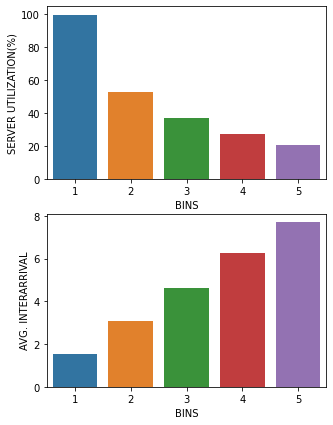

In [76]:
basicPlot(round_robin)

# RANDOM

In [172]:
random[random['TEST_ID']==4]['NUM_REQUESTS']

25    214
26    227
27    201
28    201
29    181
Name: NUM_REQUESTS, dtype: int64

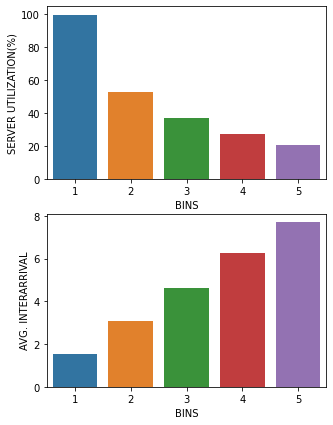

In [77]:
basicPlot(random)

# TWO CHOICES

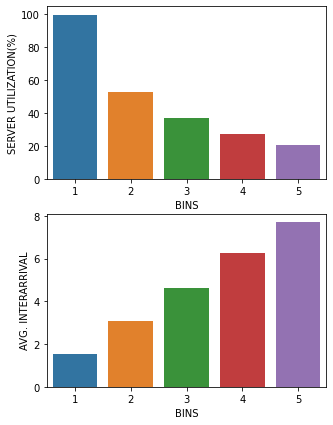

In [78]:
basicPlot(two_choices)

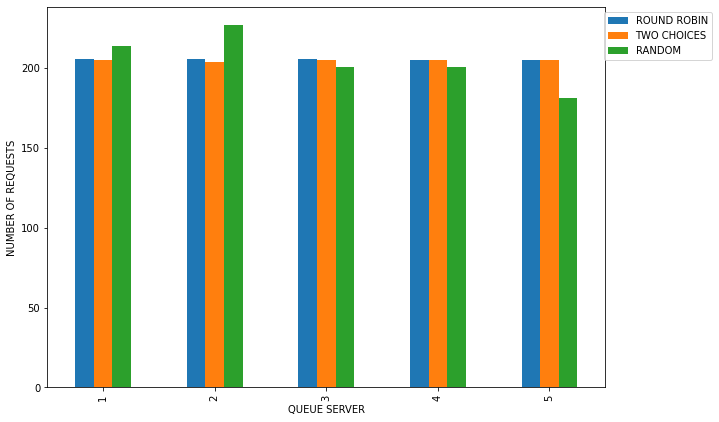

In [169]:
def plott(*args,**kwargs):
    NR =kwargs.get('y','NUM_REQUESTS')
    I =kwargs.get('bins',4)
    RR = round_robin[round_robin['TEST_ID']==I][NR].to_numpy()
    R  = random[random['TEST_ID']==I][NR].to_numpy()
    TC =two_choices[two_choices['TEST_ID']==I][NR].to_numpy()
    test = pd.DataFrame({'ROUND ROBIN':RR,'TWO CHOICES':TC,'RANDOM':R})
    test.index=(range(1,I+2))
    fig,ax = plt.subplots(1,figsize=(10,7))
    xLabel = kwargs.get('xLabel','QUEUE SERVER')
    yLabel = kwargs.get('yLabel','NUMBER OF REQUESTS')
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    test.plot(kind='bar',ax=ax)
    ax.legend(loc="upper right",bbox_to_anchor=(1.2, 1))

plott()

# Test #1

In [34]:
df = toSecDf(pd.read_csv('../results/data.csv'))
dff =df[['SIMULATION_TIME','SERVER_UTILIZATION','AVG_INTERARRIVAL','SERVICE_TIME','TEST_ID','WORKERS']] 

In [35]:
pdf = pd.pivot_table(dff,index=['WORKERS'])
pdf

,AVG_INTERARRIVAL,SERVER_UTILIZATION,SERVICE_TIME,SIMULATION_TIME,TEST_ID
WORKERS,,,,,
1,1.523071,99.939000,1.5,1.466882e+06,0
2,3.091116,52.687000,1.5,1.388480e+06,1
3,4.644696,37.328267,1.5,1.268367e+06,2
4,6.270896,27.216825,1.5,1.243077e+06,3
5,7.707261,21.023160,1.5,1.257068e+06,4


## Grafica #1
Utilizacion del servidor disminuye conforme la carga se distribuye a mas "bins"

Text(0.5, 0, 'BINS')

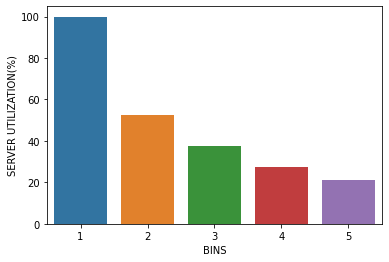

In [36]:
X = pdf[pdf.columns[1]]
ax= sns.barplot(x=X.index,y=X.values)
ax.set_ylabel("SERVER UTILIZATION(%)")
ax.set_xlabel("BINS")

## Grafica #2 
El interarribo promedio aumenta conforme se distribuye la carga a mas "bins"

Text(0, 0.5, 'AVG. INTERARRIVAL')

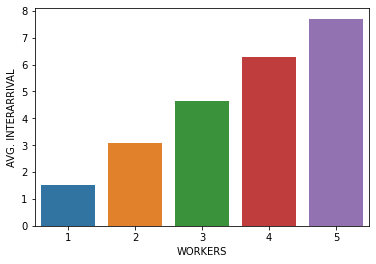

In [37]:
X = pdf[pdf.columns[0]]
ax = sns.barplot(x=X.index,y=X.values)
ax.set_ylabel("AVG. INTERARRIVAL")